In [916]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [917]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
np.random.seed(2025)
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.sample(10))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
2                  4.7               3.2                1.3               0.2   
148                6.2               3.4                5.4               2.3   
112                6.8               3.0                5.5               2.1   
132                6.4               2.8                5.6               2.2   
0                  5.1               3.5                1.4               0.2   
113                5.7               2.5                5.0               2.0   
34                 4.9               3.1                1.5               0.2   
51                 6.4               3.2                4.5               1.5   
135                7.7               3.0                6.1               2.3   
5                  5.4               3.9                1.7               0.4   

     target  
2         0  
148       2  
112       2  
132       2  
0         0  
113       2  
34        

### **<center>Let's do a quick EDA for our data</center>**

In [918]:
print(df.info(),'\n\n')
print(df.describe(),'\n\n')
print(df.isnull().sum(),'\n\n')
print(df.duplicated().sum(),'\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None 


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000     

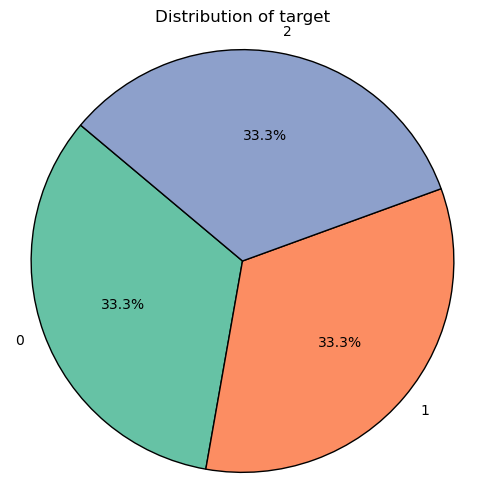

In [919]:
import matplotlib.pyplot as plt
species_counts = df['target'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%',  colors=['#66c2a5', '#fc8d62', '#8da0cb'], startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of target')
plt.axis('equal')
plt.show()

<Axes: >

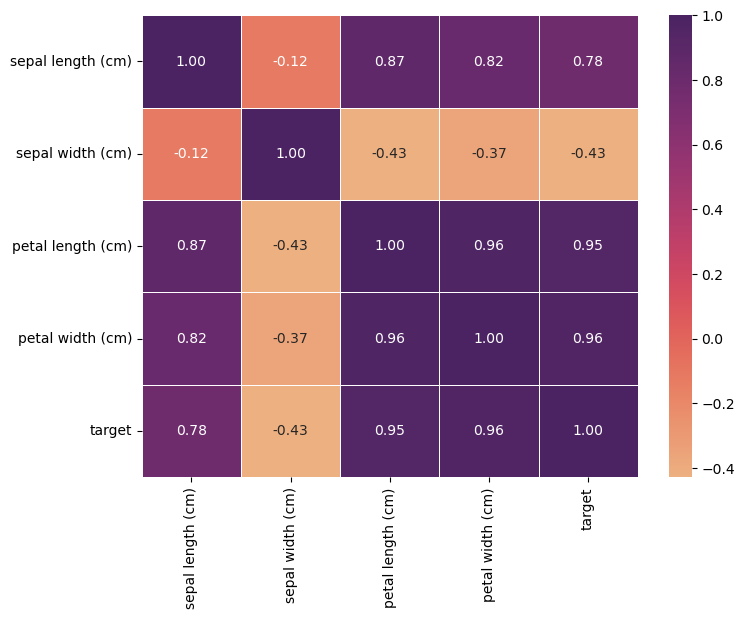

In [920]:
import seaborn as sns
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt='.2f', linewidths=0.5)

### **Although the scatter of data in the iris dataset is small, we can experimentally compare the results for normalised and non-normalised data**


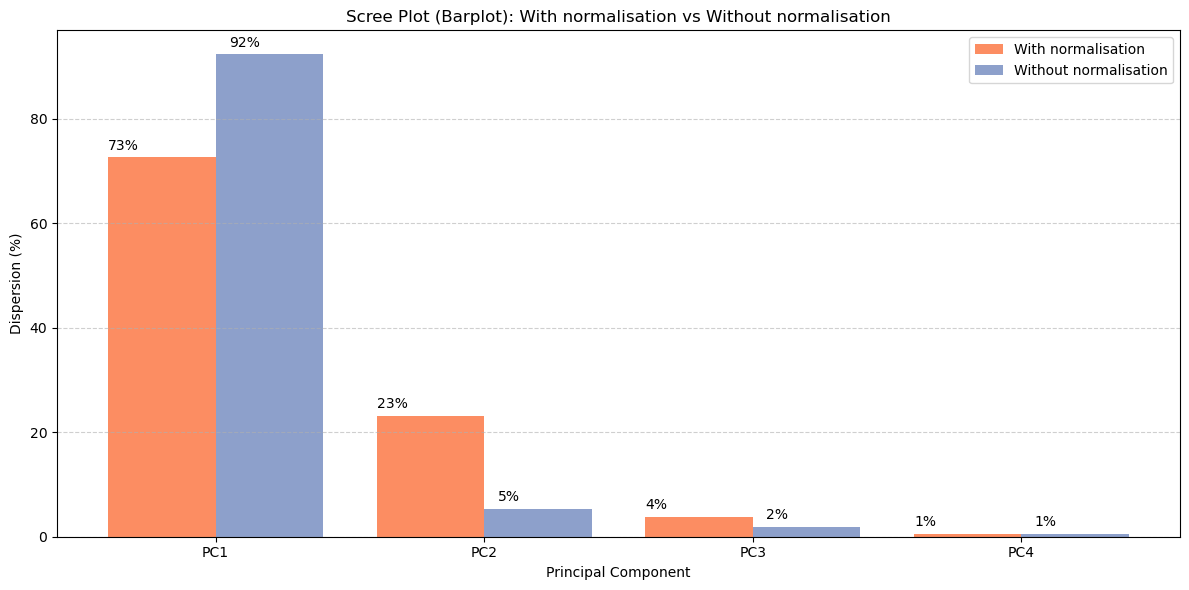

In [921]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
y = df['target']
X = df.drop(columns='target')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

pca_raw = PCA()
pca_train_raw = pca_raw.fit_transform(X_train)
explained_var_raw = pca_raw.explained_variance_ratio_ * 100

pca_scaled = PCA()
pca_train_scaled = pca_scaled.fit_transform(X_train_scaled)
explained_var_scaled = pca_scaled.explained_variance_ratio_ * 100

num_components = min(len(explained_var_raw), len(explained_var_scaled))
components = np.arange(1, num_components + 1)
bar_width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))


ax.bar(components - bar_width/2, explained_var_scaled[:num_components], 
       width=bar_width, color='#fc8d62', label='With normalisation')
ax.bar(components + bar_width/2, explained_var_raw[:num_components], 
       width=bar_width, color='#8da0cb', label='Without normalisation')

for i in range(num_components):
    ax.text(components[i] - 0.4, explained_var_scaled[i] + 1.5,
            f'{explained_var_scaled[i]:.0f}%', color='black', fontsize=10)
    ax.text(components[i] + 0.05, explained_var_raw[i] + 1.5,
            f'{explained_var_raw[i]:.0f}%', color='black', fontsize=10)

ax.set_xticks(components)
ax.set_xticklabels([f'PC{i}' for i in components])
ax.set_ylabel('Dispersion (%)')
ax.set_xlabel('Principal Component')
ax.set_title('Scree Plot (Barplot): With normalisation vs Without normalisation')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


### **Let's look at the pc to pca dipersions for our data, since we will use only 2 features for convenience, let's calculate how well this pca reflects our data**


Without normalisation:
PC1: 92.28%
PC2: 5.34%
Разом: 97.62%


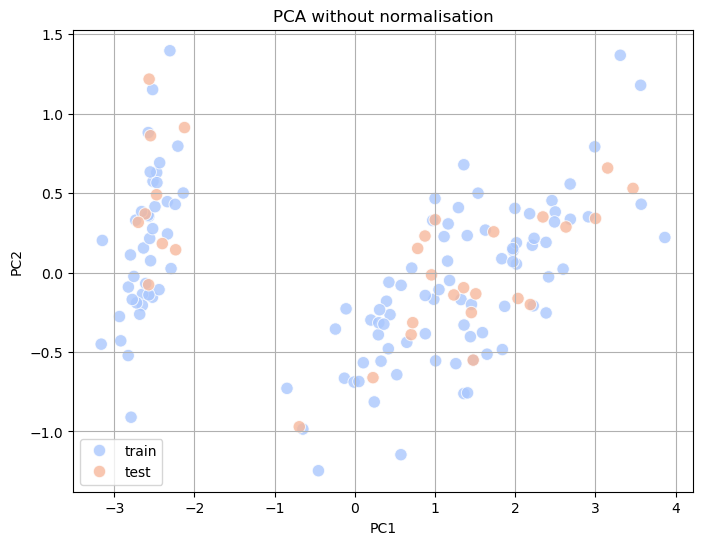

In [922]:
pca_raw = PCA(n_components=2)
pca_train_raw = pca_raw.fit_transform(X_train)
pca_test_raw = pca_raw.transform(X_test)

explained_raw = pca_raw.explained_variance_ratio_
print("Without normalisation:")
print(f"PC1: {explained_raw[0]*100:.2f}%")
print(f"PC2: {explained_raw[1]*100:.2f}%")
print(f"Разом: {(explained_raw[0] + explained_raw[1])*100:.2f}%")

train_df_raw = pd.DataFrame(pca_train_raw, columns=['PC1', 'PC2'])
train_df_raw['set'] = 'train'
test_df_raw = pd.DataFrame(pca_test_raw, columns=['PC1', 'PC2'])
test_df_raw['set'] = 'test'
pca_df_raw = pd.concat([train_df_raw, test_df_raw], ignore_index=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df_raw, x='PC1', y='PC2', hue='set', palette='coolwarm', s=80, alpha=0.8)
plt.title('PCA without normalisation')
plt.grid(True)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


With normalisation:
PC1: 72.56%
PC2: 23.19%
Разом: 95.75%


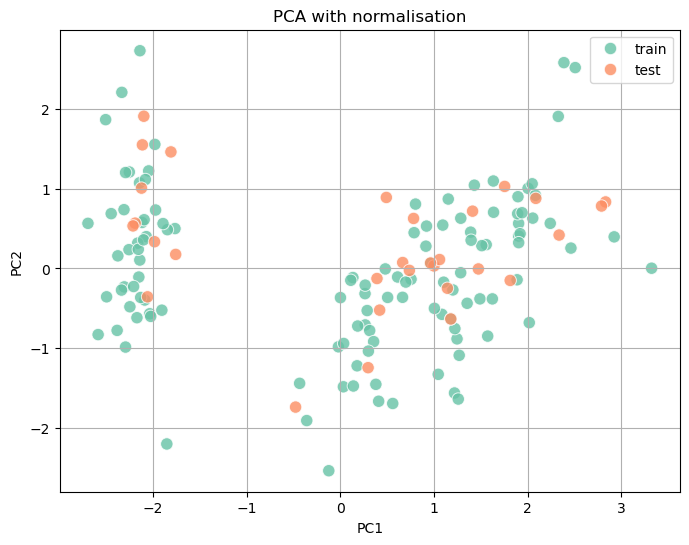

In [923]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca_scaled = PCA(n_components=2)
pca_train_scaled = pca_scaled.fit_transform(X_train_scaled)
pca_test_scaled = pca_scaled.transform(X_test_scaled)

explained_scaled = pca_scaled.explained_variance_ratio_
print("With normalisation:")
print(f"PC1: {explained_scaled[0]*100:.2f}%")
print(f"PC2: {explained_scaled[1]*100:.2f}%")
print(f"Разом: {(explained_scaled[0] + explained_scaled[1])*100:.2f}%")

train_df_scaled = pd.DataFrame(pca_train_scaled, columns=['PC1', 'PC2'])
train_df_scaled['set'] = 'train'
test_df_scaled = pd.DataFrame(pca_test_scaled, columns=['PC1', 'PC2'])
test_df_scaled['set'] = 'test'
pca_df_scaled = pd.concat([train_df_scaled, test_df_scaled], ignore_index=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df_scaled, x='PC1', y='PC2', hue='set', palette='Set2', s=80, alpha=0.8)
plt.title('PCA with normalisation')
plt.grid(True)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


### **<center>Let's see what features and how they affected our pc-1 and pc-2</center>**

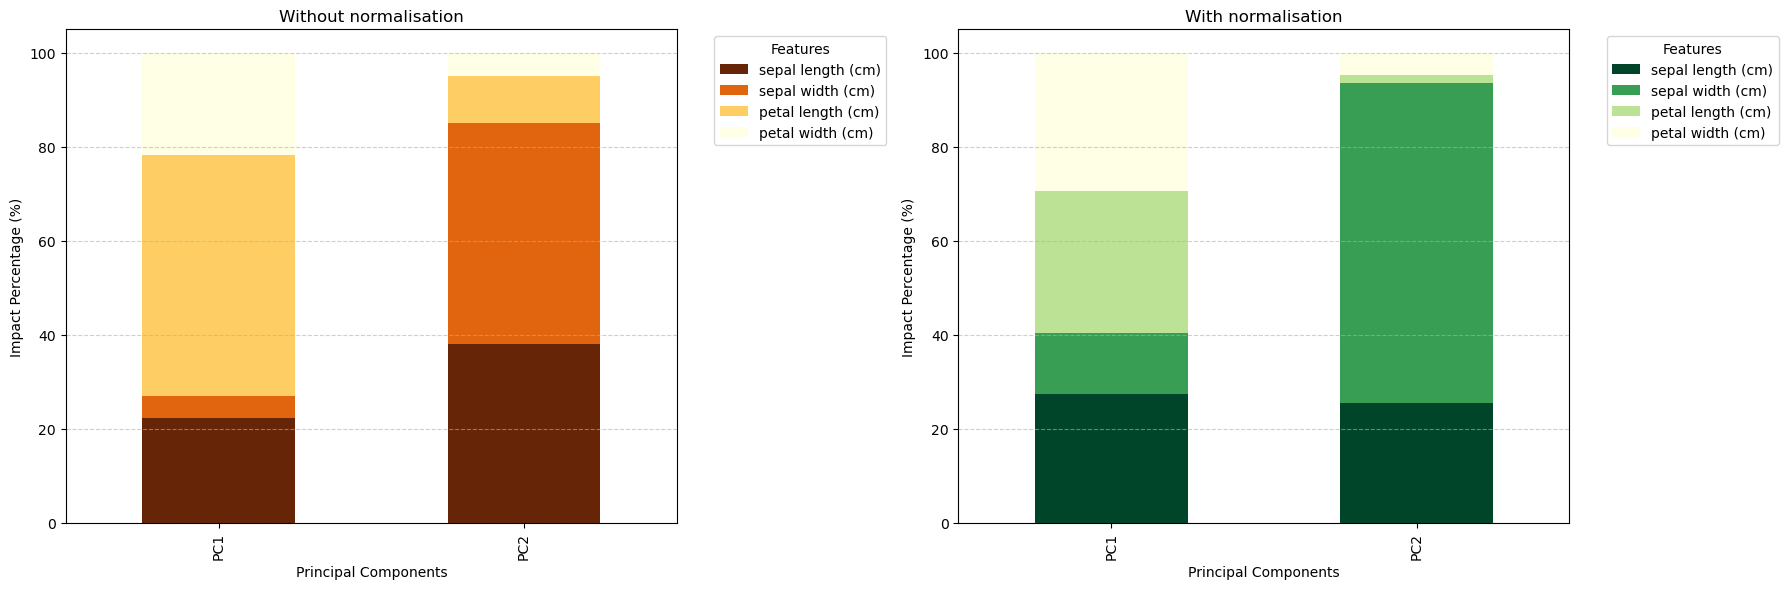

In [924]:
# Without normalisation
loading_raw = pca_raw.components_.T
loading_raw_df = pd.DataFrame(loading_raw, index=X.columns, columns=['PC1', 'PC2'])
loading_raw_abs = loading_raw_df.abs()
loading_raw_percent = loading_raw_abs.divide(loading_raw_abs.sum()) * 100

# With normalisation
loading_scaled = pca_scaled.components_.T
loading_scaled_df = pd.DataFrame(loading_scaled, index=X.columns, columns=['PC1', 'PC2'])
loading_scaled_abs = loading_scaled_df.abs()
loading_scaled_percent = loading_scaled_abs.divide(loading_scaled_abs.sum()) * 100


fig, axs = plt.subplots(1, 2, figsize=(18, 6))

loading_raw_percent.T.plot(kind='bar', stacked=True, ax=axs[0], colormap='YlOrBr_r')
axs[0].set_title('Without normalisation')
axs[0].set_ylabel('Impact Percentage (%)')
axs[0].set_xlabel('Principal Components')
axs[0].legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

loading_scaled_percent.T.plot(kind='bar', stacked=True, ax=axs[1], colormap='YlGn_r')
axs[1].set_title('With normalisation')
axs[1].set_ylabel('Impact Percentage (%)')
axs[1].set_xlabel('Principal Components')
axs[1].legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


### **<center>Determine the number of clusters for K-means</center>**

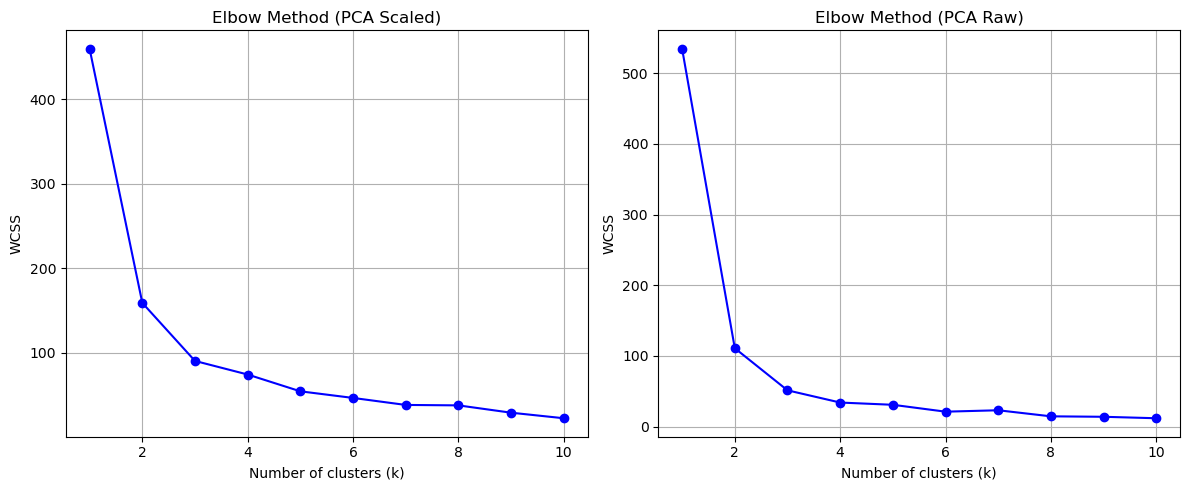

In [925]:
from sklearn.cluster import KMeans

k_range_elbow = range(1, 11)

def compute_wcss(X):
    wcss = []
    for k in k_range_elbow:
        kmeans = KMeans(n_clusters=k, init='k-means++')
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    return wcss

wcss_scaled = compute_wcss(pca_train_scaled)
wcss_raw = compute_wcss(pca_train_raw)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(k_range_elbow, wcss_scaled, 'bo-')
axs[0].set_title('Elbow Method (PCA Scaled)')
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('WCSS')
axs[0].grid(True)

axs[1].plot(k_range_elbow, wcss_raw, 'bo-')
axs[1].set_title('Elbow Method (PCA Raw)')
axs[1].set_xlabel('Number of clusters (k)')
axs[1].set_ylabel('WCSS')
axs[1].grid(True)

plt.tight_layout()
plt.show()


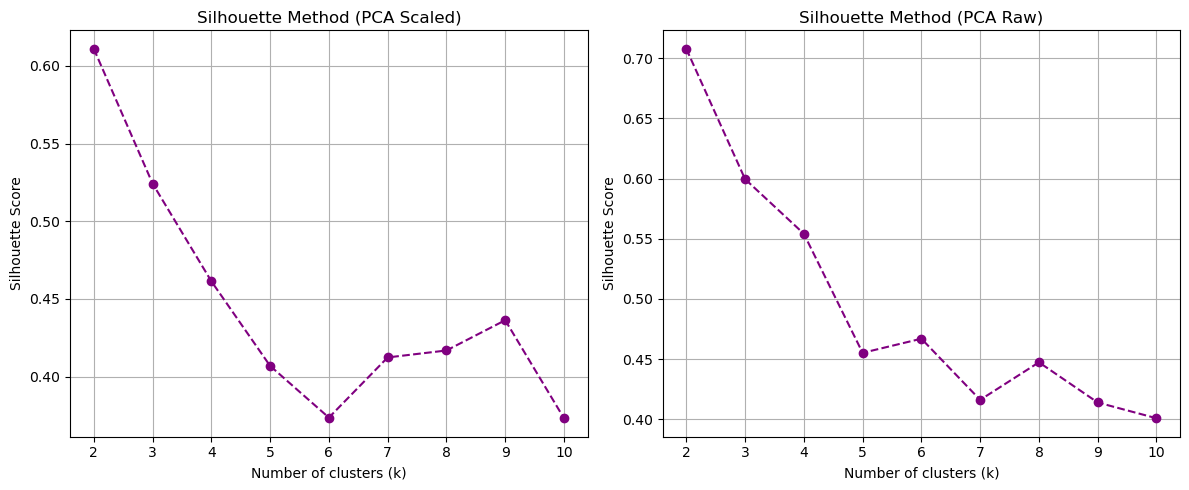

In [926]:
from sklearn.metrics import silhouette_score

k_range = range(2, 11)

def compute_silhouette(X):
    scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++')
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
    return scores

silhouette_scaled = compute_silhouette(pca_train_scaled)
silhouette_raw = compute_silhouette(pca_train_raw)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(k_range, silhouette_scaled, 'o--', color='purple')
axs[0].set_title('Silhouette Method (PCA Scaled)')
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Silhouette Score')
axs[0].grid(True)

axs[1].plot(k_range, silhouette_raw, 'o--', color='purple')
axs[1].set_title('Silhouette Method (PCA Raw)')
axs[1].set_xlabel('Number of clusters (k)')
axs[1].set_ylabel('Silhouette Score')
axs[1].grid(True)

plt.tight_layout()
plt.show()


### **If we look at the indicators, the optimal number of clusters is 2, although in fact we know that there are 3 labels in the dataset**

Value of 0: 9 times
Value of 1: 21 times


 target
2    13
0     9
1     8
Name: count, dtype: int64
Clustering Accuracy (scaled)): 0.7333


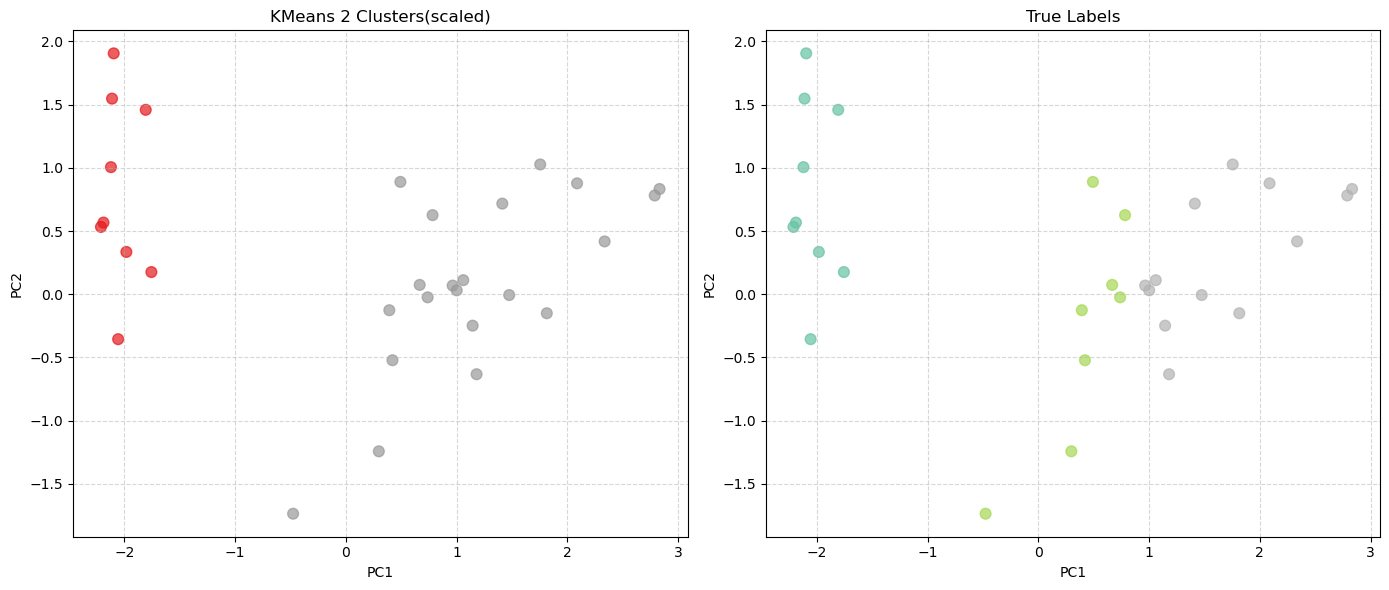

In [927]:
from scipy.optimize import linear_sum_assignment
kmeans = KMeans(n_clusters=2, init='k-means++') 
labels = kmeans.fit_predict(pca_test_scaled)

values, counts = np.unique(labels, return_counts=True)
for val, count in zip(values, counts):
    print(f"Value of {val}: {count} times")
print('\n\n',y_test.value_counts())

def clustering_accuracy(true_labels, cluster_labels):
    D = max(cluster_labels.max(), true_labels.max()) + 1
    cost_matrix = np.zeros((D, D), dtype=np.int64)

    for i in range(len(cluster_labels)):
        cost_matrix[cluster_labels[i], true_labels[i]] += 1

    row_ind, col_ind = linear_sum_assignment(-cost_matrix)
    total_correct = cost_matrix[row_ind, col_ind].sum()

    return total_correct / len(cluster_labels)


acc = clustering_accuracy(y_test.to_numpy(), labels)
print(f"Clustering Accuracy (scaled)): {acc:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(
    pca_test_scaled[:, 0], pca_test_scaled[:, 1],
    c=labels, cmap='Set1', s=60, alpha=0.7
)
axes[0].set_title('KMeans 2 Clusters(scaled)')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True, linestyle='--', alpha=0.5)

scatter = axes[1].scatter(
    pca_test_scaled[:, 0], pca_test_scaled[:, 1],
    c=y_test, cmap='Set2', s=60, alpha=0.7
)
axes[1].set_title('True Labels')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



### **<center>Let's look at the coincidences for 3 clusters</center>**

Value of 0: 13 times
Value of 1: 9 times
Value of 2: 8 times


 target
2    13
0     9
1     8
Name: count, dtype: int64
Clustering Accuracy (scaled)): 0.8333


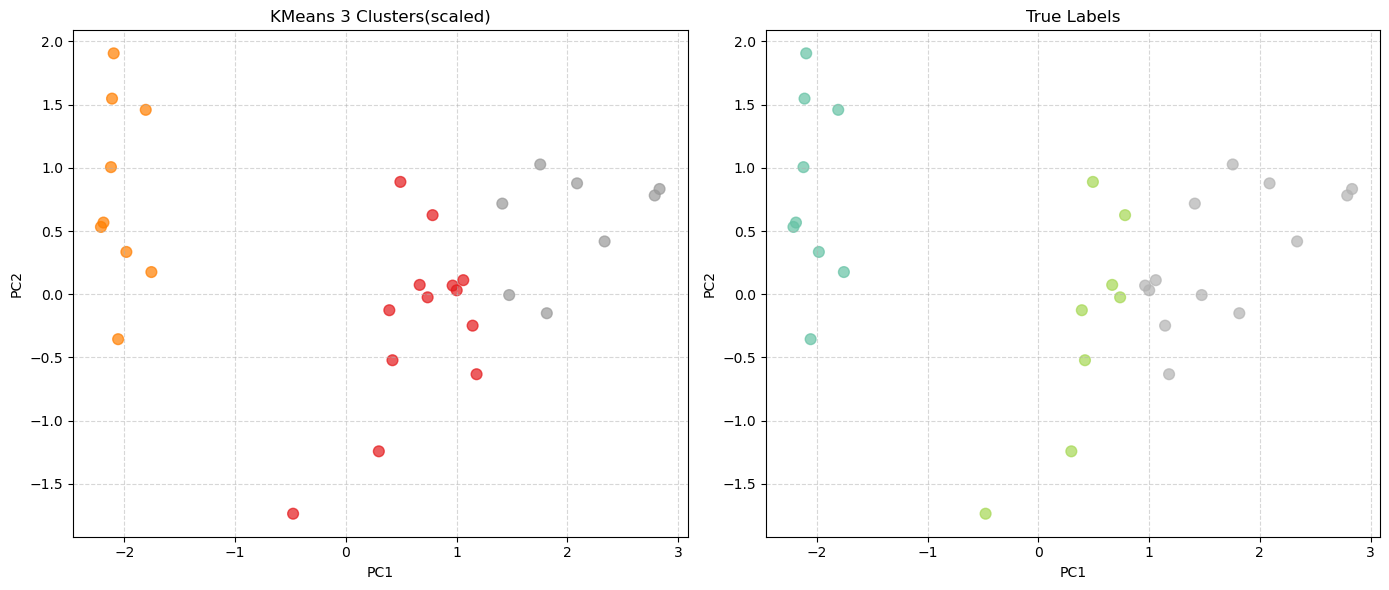

In [928]:
kmeans = KMeans(n_clusters=3, init='k-means++') 
labels = kmeans.fit_predict(pca_test_scaled)

values, counts = np.unique(labels, return_counts=True)
for val, count in zip(values, counts):
    print(f"Value of {val}: {count} times")
print('\n\n',y_test.value_counts())

acc = clustering_accuracy(y_test.to_numpy(), labels)
clustering_acc_scaled = acc.copy()
print(f"Clustering Accuracy (scaled)): {acc:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(
    pca_test_scaled[:, 0], pca_test_scaled[:, 1],
    c=labels, cmap='Set1', s=60, alpha=0.7
)
axes[0].set_title('KMeans 3 Clusters(scaled)')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True, linestyle='--', alpha=0.5)

scatter = axes[1].scatter(
    pca_test_scaled[:, 0], pca_test_scaled[:, 1],
    c=y_test, cmap='Set2', s=60, alpha=0.7
)
axes[1].set_title('True Labels')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

### **<center>Compare the results with non-normalised features</center>**


Value of 0: 7 times
Value of 1: 9 times
Value of 2: 14 times


 target
2    13
0     9
1     8
Name: count, dtype: int64
Clustering Accuracy (scaled): 0.8000


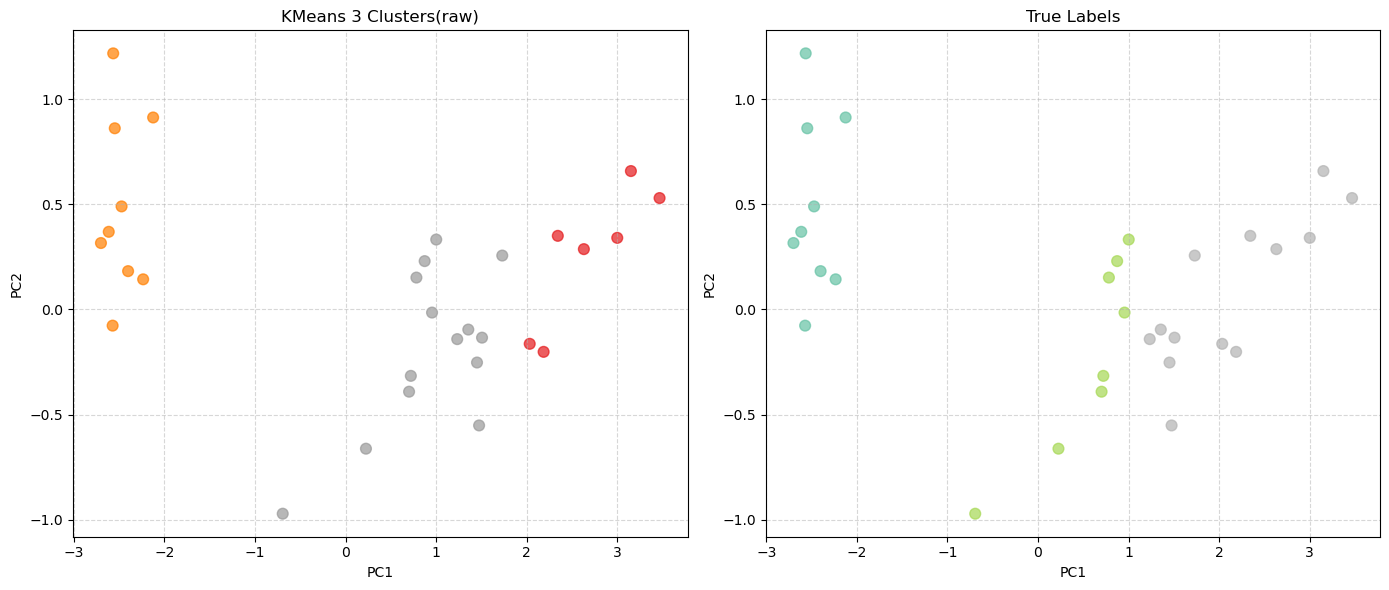

In [929]:
kmeans = KMeans(n_clusters=3, init='k-means++') 
labels = kmeans.fit_predict(pca_test_raw)

values, counts = np.unique(labels, return_counts=True)
for val, count in zip(values, counts):
    print(f"Value of {val}: {count} times")
print('\n\n',y_test.value_counts())

acc = clustering_accuracy(y_test.to_numpy(), labels)
clustering_acc_raw = acc.copy()
print(f"Clustering Accuracy (scaled): {acc:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(
    pca_test_raw[:, 0], pca_test_raw[:, 1],
    c=labels, cmap='Set1', s=60, alpha=0.7
)
axes[0].set_title('KMeans 3 Clusters(raw)')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True, linestyle='--', alpha=0.5)

scatter = axes[1].scatter(
    pca_test_raw[:, 0], pca_test_raw[:, 1],
    c=y_test, cmap='Set2', s=60, alpha=0.7
)
axes[1].set_title('True Labels')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

### **<center>The results on normalised data were slightly better than on non-normalised data</center>**


### **<center>Compare the results with the supervised ml model</center>**


Nearest Centroid Classifier Results:0.9666666666666667, K-means Results:0.8


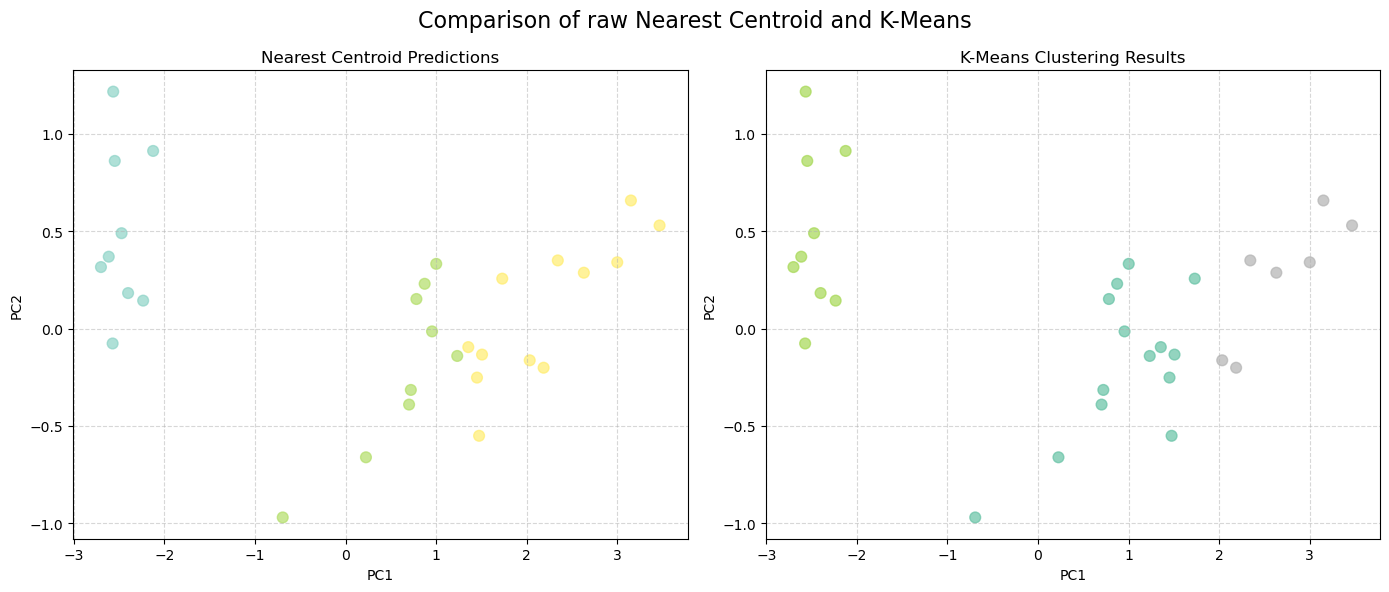

In [930]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
ncc = NearestCentroid()
ncc.fit(pca_test_raw, y_test)
ncc_preds = ncc.predict(pca_test_raw)

kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans_preds = kmeans.fit_predict(pca_test_raw)

print(f"Nearest Centroid Classifier Results:{accuracy_score(y_test, ncc_preds)}, K-means Results:{clustering_acc_raw}")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Comparison of raw Nearest Centroid and K-Means", fontsize=16)

axes[0].scatter(
    pca_test_raw[:, 0], pca_test_raw[:, 1],
    c=ncc_preds, cmap='Set3', s=60, alpha=0.7
)
axes[0].set_title('Nearest Centroid Predictions')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True, linestyle='--', alpha=0.5)

axes[1].scatter(
    pca_test_raw[:, 0], pca_test_raw[:, 1],
    c=kmeans_preds, cmap='Set2', s=60, alpha=0.7
)
axes[1].set_title('K-Means Clustering Results')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Nearest Centroid Classifier Results:0.8333333333333334, K-means Results:0.8333333333333334


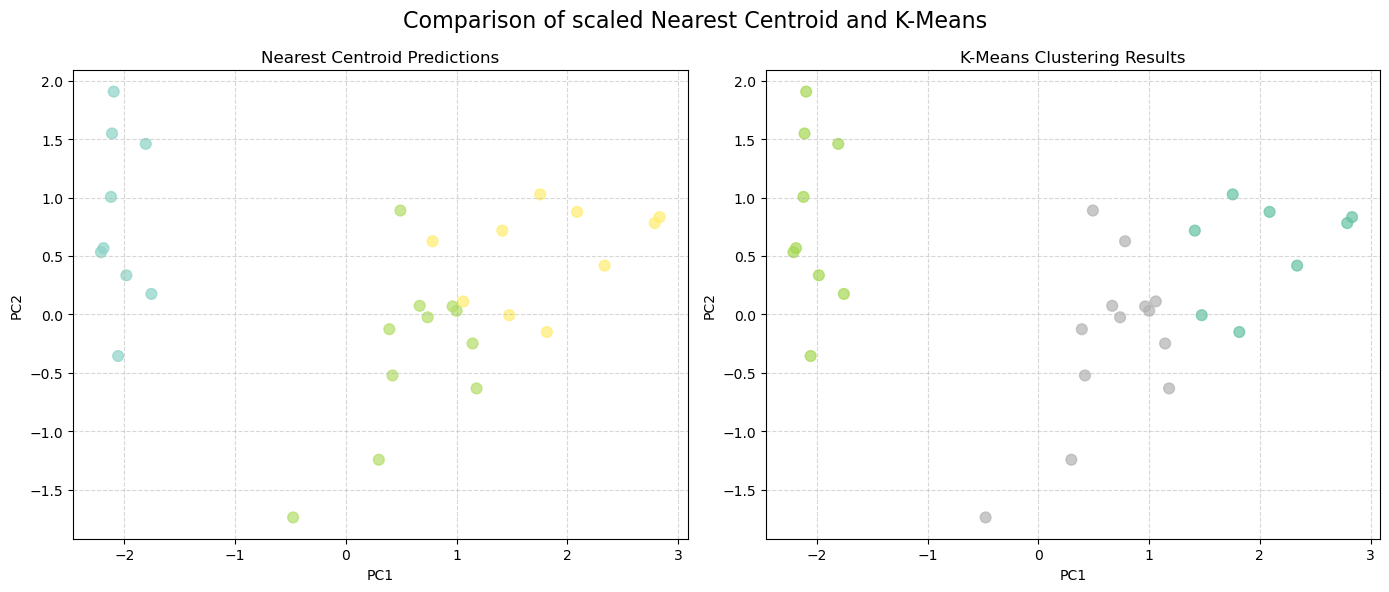

In [931]:
from sklearn.neighbors import NearestCentroid

ncc = NearestCentroid()
ncc.fit(pca_test_scaled, y_test)
ncc_preds = ncc.predict(pca_test_scaled)

kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans_preds = kmeans.fit_predict(pca_test_scaled)

print(f"Nearest Centroid Classifier Results:{accuracy_score(y_test, ncc_preds)}, K-means Results:{clustering_acc_scaled}")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Comparison of scaled Nearest Centroid and K-Means", fontsize=16)

axes[0].scatter(
    pca_test_scaled[:, 0], pca_test_scaled[:, 1],
    c=ncc_preds, cmap='Set3', s=60, alpha=0.7
)
axes[0].set_title('Nearest Centroid Predictions')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True, linestyle='--', alpha=0.5)

axes[1].scatter(
    pca_test_scaled[:, 0], pca_test_scaled[:, 1],
    c=kmeans_preds, cmap='Set2', s=60, alpha=0.7
)
axes[1].set_title('K-Means Clustering Results')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
